# Step 1 : Importing of Data and display

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [117]:
df= pd.read_csv("renttherunway.csv")

In [118]:
df

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [119]:
df.head(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [120]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [122]:
df.shape

(192544, 16)

# Step 2 : EDA

In [123]:
duplicate = df[df.duplicated()]

In [124]:
duplicate.shape

(0, 16)

In [125]:
df.duplicated().sum()

0

In [126]:
df=df.drop(['Unnamed: 0'], axis=1)

In [127]:
df

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [128]:
df=df.drop(['user_id'], axis=1)

In [129]:
df

,fit,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [130]:
df=df.drop(['review_text'], axis=1)

In [131]:
df

,fit,bust size,item_id,weight,rating,rented for,body type,review_summary,category,height,size,age,review_date
0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,34b,153475,132lbs,10.0,other,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,NaN,1063761,NaN,10.0,party,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,34c,126335,135lbs,8.0,formal affair,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,34b,616682,145lbs,10.0,wedding,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,2252812,140lbs,10.0,work,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,32c,682043,100lbs,10.0,work,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,36a,683251,135lbs,6.0,everyday,straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,36c,126335,165lbs,10.0,wedding,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [132]:
df=df.drop(['review_summary'], axis=1)

In [133]:
df

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,2252812,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,32c,682043,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,36a,683251,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,36c,126335,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0,"November 25, 2015"


In [134]:
df=df.drop(['review_date'], axis=1)

In [135]:
df

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,2252812,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32c,682043,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36a,683251,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36c,126335,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0


In [136]:
df=df.drop(['item_id'], axis=1)

In [137]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32c,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36a,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36c,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0


In [138]:
df['weight'] = df['weight'].str.replace(r'\D', '')

C:\Users\user\AppData\Local\Temp\ipykernel_14216\614450129.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['weight'] = df['weight'].str.replace(r'\D', '')


In [139]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32c,100,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36a,135,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36c,165,10.0,wedding,pear,dress,"5' 6""",16,31.0


In [140]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

In [141]:
df.rename(columns = {'rented for':'rented_for'}, inplace = True)

In [142]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented_for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

In [143]:
df.rented_for.unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [144]:
df['rented_for'] = df['rented_for'].replace(['party: cocktail'],'party')

In [145]:
df.rented_for.unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [146]:
df

,fit,bust size,weight,rating,rented_for,body type,category,height,size,age
0,fit,34d,137,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32c,100,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36a,135,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36c,165,10.0,wedding,pear,dress,"5' 6""",16,31.0


In [147]:
def feet_to_float(cell_string):
    try:
        split_strings = cell_string.replace('"','').replace("'",'').split()
        float1 = float(split_strings[0])*12
        float2 = float(split_strings[1])
        float_value = float1 + float2
    except:
        float_value = np.nan
    return float_value

In [148]:
df['height'] = df['height'].apply(feet_to_float)

In [149]:
df

,fit,bust size,weight,rating,rented_for,body type,category,height,size,age
0,fit,34d,137,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,64.0,4,116.0
3,fit,34c,135,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145,10.0,wedding,athletic,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,32c,100,10.0,work,petite,dress,61.0,4,29.0
192541,fit,36a,135,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,36c,165,10.0,wedding,pear,dress,66.0,16,31.0


In [150]:
df.isna().sum()/df.shape[0]*100

fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented_for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [151]:
cols = ["bust size", "weight","rating","rented_for","body type","height","age"]
df[cols]=df[cols].fillna(df.mean().iloc[0])

df.isna().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_14216\3016700607.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[cols]=df[cols].fillna(df.mean().iloc[0])


fit           0
bust size     0
weight        0
rating        0
rented_for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [152]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented_for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

In [153]:
df.rename(columns = {'bust size':'bust_size'}, inplace = True)
df.rename(columns = {'body type':'body_type'}, inplace = True)

In [154]:
df.describe()

,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000
mean,9.092371,65.112954,12.245175,33.747474
std,1.429740,4.259426,8.494877,8.225262
min,2.000000,9.092371,0.000000,0.000000
25%,8.000000,63.000000,8.000000,29.000000
50%,10.000000,65.000000,12.000000,32.000000
75%,10.000000,67.000000,16.000000,37.000000
max,10.000000,78.000000,58.000000,117.000000


- Mean age is 33
- Mean size is 12
- Mean height is 65 (inches implied)
- Mean rating is 9
- Min age is 0 and Max age is 117. This shows the presence of outliers in Age

In [155]:
df['age'].describe()

count    192544.000000
mean         33.747474
std           8.225262
min           0.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         117.000000
Name: age, dtype: float64

In [156]:
Q1 = np.percentile(df['age'], 25,interpolation = 'midpoint')

In [157]:
Q3 = np.percentile(df['age'], 75, interpolation = 'midpoint')

In [158]:
IQR = Q3 - Q1

In [159]:
upper = np.where(df['age'] >= (Q3+1.5*IQR))

In [160]:
lower = np.where(df['age'] <= (Q1-1.5*IQR))

In [161]:
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

In [162]:
df['age'].describe()

count    179748.000000
mean         32.547839
std           5.917195
min          18.000000
25%          29.000000
50%          32.000000
75%          36.000000
max          48.000000
Name: age, dtype: float64

In [163]:
df.shape

(179748, 10)

<AxesSubplot:>

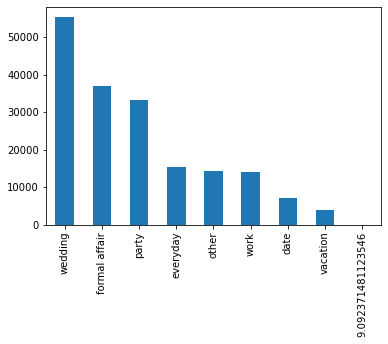

In [164]:
df['rented_for'].value_counts().plot(kind='bar')

# Step 3: Encoding Variables

In [165]:
df.head()

,fit,bust_size,weight,rating,rented_for,body_type,category,height,size,age
0,fit,34d,137,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145,10.0,wedding,athletic,gown,69.0,12,27.0
5,fit,32b,138,8.0,date,athletic,dress,68.0,8,45.0


In [166]:
    BodyType = pd.get_dummies(df["body_type"])
    df=pd.concat([df, BodyType], axis=1)
    df=df.drop(['body_type'], axis=1)

In [167]:
df

,fit,bust_size,weight,rating,rented_for,category,height,size,age,9.092371481123546,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
0,fit,34d,137,10.0,vacation,romper,68.0,14,28.0,0,0,0,0,1,0,0,0
1,fit,34b,132,10.0,other,gown,66.0,12,36.0,0,0,0,0,0,0,0,1
3,fit,34c,135,8.0,formal affair,dress,65.0,8,34.0,0,0,0,0,0,1,0,0
4,fit,34b,145,10.0,wedding,gown,69.0,12,27.0,0,0,1,0,0,0,0,0
5,fit,32b,138,8.0,date,dress,68.0,8,45.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140,10.0,work,jumpsuit,69.0,8,42.0,0,0,0,0,1,0,0,0
192540,fit,32c,100,10.0,work,dress,61.0,4,29.0,0,0,0,0,0,0,1,0
192541,fit,36a,135,6.0,everyday,dress,68.0,8,31.0,0,0,0,0,0,0,0,1
192542,fit,36c,165,10.0,wedding,dress,66.0,16,31.0,0,0,0,0,0,1,0,0


In [168]:
Category = pd.get_dummies(df["category"])
df=pd.concat([df, Category], axis=1)
df=df.drop(['category'], axis=1)

In [169]:
df

,fit,bust_size,weight,rating,rented_for,height,size,age,9.092371481123546,apple,...,tank,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest
0,fit,34d,137,10.0,vacation,68.0,14,28.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,fit,34b,132,10.0,other,66.0,12,36.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fit,34c,135,8.0,formal affair,65.0,8,34.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fit,34b,145,10.0,wedding,69.0,12,27.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,fit,32b,138,8.0,date,68.0,8,45.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140,10.0,work,69.0,8,42.0,0,0,...,0,0,0,0,0,0,0,0,0,0
192540,fit,32c,100,10.0,work,61.0,4,29.0,0,0,...,0,0,0,0,0,0,0,0,0,0
192541,fit,36a,135,6.0,everyday,68.0,8,31.0,0,0,...,0,0,0,0,0,0,0,0,0,0
192542,fit,36c,165,10.0,wedding,66.0,16,31.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
df.describe()

,rating,height,size,age,9.092371481123546,apple,athletic,full bust,hourglass,pear,...,tank,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest
count,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,...,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000,179748.000000
mean,9.092082,65.115443,12.032846,32.547839,0.073831,0.024084,0.228442,0.076068,0.288070,0.116363,...,0.000962,0.000100,0.000072,0.024907,0.000111,0.000256,0.000083,0.000812,0.000178,0.001446
std,1.426457,4.270246,8.388847,5.917195,0.261497,0.153310,0.419830,0.265107,0.452865,0.320660,...,0.031009,0.010007,0.008504,0.155842,0.010548,0.015995,0.009135,0.028488,0.013342,0.038005
min,2.000000,9.092371,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,63.000000,5.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,65.000000,12.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,67.000000,16.000000,36.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,78.000000,58.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
df.columns

Index([              'fit',         'bust_size',            'weight',
                  'rating',        'rented_for',            'height',
                    'size',               'age',   9.092371481123546,
                   'apple',          'athletic',         'full bust',
               'hourglass',              'pear',            'petite',
       'straight & narrow',          'ballgown',            'blazer',
                  'blouse',           'blouson',            'bomber',
              'buttondown',            'caftan',              'cami',
                    'cape',          'cardigan',              'coat',
                   'combo',          'crewneck',           'culotte',
                'culottes',              'down',             'dress',
                  'duster',               'for',             'frock',
                    'gown',            'henley',            'hoodie',
                  'jacket',             'jeans',            'jogger',
                'jum

In [172]:
df1=df.copy()

In [173]:
bust_size = pd.get_dummies(df["bust_size"])
df=pd.concat([df, bust_size], axis=1)
df=df.drop(['bust_size'], axis=1)

rented_for = pd.get_dummies(df["rented_for"])
df=pd.concat([df, rented_for], axis=1)
df=df.drop(['rented_for'], axis=1)

In [174]:
df

,fit,weight,rating,height,size,age,9.092371481123546,apple,athletic,full bust,...,48dd,9.092371481123546,date,everyday,formal affair,other,party,vacation,wedding,work
0,fit,137,10.0,68.0,14,28.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,fit,132,10.0,66.0,12,36.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,fit,135,8.0,65.0,8,34.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,fit,145,10.0,69.0,12,27.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,fit,138,8.0,68.0,8,45.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,140,10.0,69.0,8,42.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192540,fit,100,10.0,61.0,4,29.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192541,fit,135,6.0,68.0,8,31.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
192542,fit,165,10.0,66.0,16,31.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [175]:
df.columns

Index([            'fit',          'weight',          'rating',
                'height',            'size',             'age',
       9.092371481123546,           'apple',        'athletic',
             'full bust',
       ...
                  '48dd', 9.092371481123546,            'date',
              'everyday',   'formal affair',           'other',
                 'party',        'vacation',         'wedding',
                  'work'],
      dtype='object', length=197)

In [176]:
fit = pd.get_dummies(df["fit"])
df=pd.concat([df, fit], axis=1)
df=df.drop(['fit'], axis=1)

In [177]:
df

,weight,rating,height,size,age,9.092371481123546,apple,athletic,full bust,hourglass,...,date,everyday,formal affair,other,party,vacation,wedding,work,large,small
0,137,10.0,68.0,14,28.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,132,10.0,66.0,12,36.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,135,8.0,65.0,8,34.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,145,10.0,69.0,12,27.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,138,8.0,68.0,8,45.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,140,10.0,69.0,8,42.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
192540,100,10.0,61.0,4,29.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
192541,135,6.0,68.0,8,31.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
192542,165,10.0,66.0,16,31.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [178]:
ss = StandardScaler()

df_scaled = df.copy()

df_scaled.iloc[:,:] = ss.fit_transform(df_scaled.iloc[:,:])
df_scaled.head(2)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


,weight,rating,height,size,age,9.092371481123546,apple,athletic,full bust,hourglass,...,date,everyday,formal affair,other,party,vacation,wedding,work,large,small
0,0.389934,0.636486,0.675503,0.234497,-0.768582,-0.282341,-0.157093,-0.544131,-0.286933,1.572062,...,-0.200955,-0.306751,-0.508768,-0.293311,-0.475627,6.829393,-0.666065,-0.289852,-0.38643,-0.391274
1,0.291170,0.636486,0.207145,-0.003915,0.583413,-0.282341,-0.157093,-0.544131,-0.286933,-0.636107,...,-0.200955,-0.306751,-0.508768,3.409346,-0.475627,-0.146426,-0.666065,-0.289852,-0.38643,-0.391274


# Step 4: PCA and Clustering

In [179]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [180]:
cov_matrix = np.cov(df_scaled.T)

In [181]:
cov_matrix

array([[ 1.00000556e+00, -1.05412862e-02,  8.83114810e-02, ...,
         2.16470257e-02, -6.63924969e-04,  1.22795375e-02],
       [-1.05412862e-02,  1.00000556e+00,  4.14625809e-03, ...,
        -4.95314097e-02, -1.46822149e-01, -1.82835380e-01],
       [ 8.83114810e-02,  4.14625809e-03,  1.00000556e+00, ...,
        -3.52479735e-03, -1.33381254e-02,  4.61883013e-03],
       ...,
       [ 2.16470257e-02, -4.95314097e-02, -3.52479735e-03, ...,
         1.00000556e+00,  2.09780386e-02, -8.13111315e-03],
       [-6.63924969e-04, -1.46822149e-01, -1.33381254e-02, ...,
         2.09780386e-02,  1.00000556e+00, -1.51200892e-01],
       [ 1.22795375e-02, -1.82835380e-01,  4.61883013e-03, ...,
        -8.13111315e-03, -1.51200892e-01,  1.00000556e+00]])

In [182]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [183]:
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 1.31216589e-01  3.48830462e-02  1.17323936e-01 ...  1.07890915e-04
  -8.43473205e-05  1.06686036e-06]
 [-3.85164619e-02 -1.31275649e-01 -7.86248959e-02 ...  6.83714623e-04
   1.10006627e-03 -1.15150795e-03]
 [ 1.51114555e-01 -2.11911864e-02  6.02279186e-02 ...  4.48922601e-04
  -6.97892842e-05 -4.63582462e-04]
 ...
 [-1.21342253e-02  1.77327242e-01  1.27777434e-01 ...  3.58987359e-04
  -4.45435909e-04 -5.90318343e-04]
 [-3.85965981e-02  9.02763001e-02  1.45324776e-01 ...  1.96781273e-04
   3.70110820e-04 -4.85291835e-04]
 [ 6.46487175e-02  4.98302034e-02 -1.02531435e-01 ...  4.12218420e-04
   4.09682794e-04 -2.78874246e-04]]


Eigen values: 
 [ 2.26403671e+00  2.07981208e+00  1.76550022e+00  1.63710436e+00
  3.04802267e-01  4.20815165e-01  1.52235998e+00  5.54821575e-01
  1.39979827e+00  1.38423170e+00  1.34465945e+00  6.66572548e-01
  6.78608912e-01  1.28588664e+00  1.25923237e+00  7.31225543e-01
  7.56028378e-01  5.85764753e-16 -5.03609109e-16 -9.16773438e-16
 -8.

In [184]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)
print('Total',total)

Variance Explained:  [1.1434465217864687, 1.0504042956022714, 0.891661817128307, 0.8268157838414071, 0.7688643977519941, 0.7069648878386076, 0.6991030300428603, 0.6791171562711857, 0.6494340847685058, 0.6359724060635056, 0.6265898942820196, 0.5975601634511468, 0.5914508556232543, 0.5860435738778303, 0.5832172215100162, 0.5750012497252153, 0.5733706193862842, 0.5638321089773044, 0.5614735199953395, 0.554086356268497, 0.5503621902984444, 0.5484410609556065, 0.5466950962722391, 0.5429012062566457, 0.5394240297519136, 0.5371068874052872, 0.534804412501812, 0.5341141625638548, 0.5318872357450489, 0.5308106894731016, 0.5288956713311206, 0.5275504412907995, 0.526390091111214, 0.5241258693541679, 0.5234425511694862, 0.5224456222623037, 0.5210387492222883, 0.5204780527353294, 0.5199508524349716, 0.5192663226544529, 0.5184974493454435, 0.517922060442318, 0.5174155602326036, 0.5167826285201937, 0.5161782511258041, 0.5157790748309842, 0.515300811375324, 0.5147916599706402, 0.5142197478103158, 0.51

In [185]:
plt.figure(figsize=(150,150))
plt.bar(range(198),var_exp, align='center',color='Blue',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(198), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

- First Three principal components explain 99% of the variance in the data. 
- so, we can choose the optimal number of principal components as 3.

In [186]:
X = df.drop('rating',axis=1)
y = df['rating']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [188]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [189]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


## K Means

In [190]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\an

,num_clusters,cluster_errors
0,1,3.559010e+07
1,2,3.527675e+07
2,3,3.509549e+07
3,4,3.486008e+07
4,5,3.467823e+07
5,6,3.447687e+07
6,7,3.430425e+07
7,8,3.417691e+07
8,9,3.394709e+07
9,10,3.377781e+07


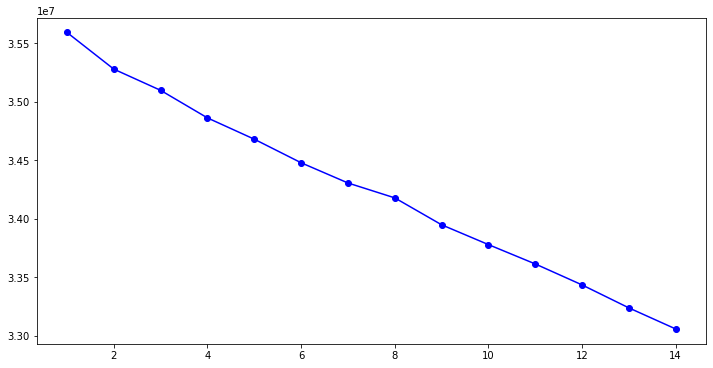

In [191]:
## Elbow plot
plt.figure(figsize=[12,6])
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [192]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(df_scaled)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3, n_init=15, random_state=2345)

In [193]:
kmeans.labels_

array([0, 2, 0, ..., 0, 1, 2])

In [194]:
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))

df_labels.head(5)

,Labels
0,0
1,2
2,0
3,2
4,0


In [195]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [196]:
df_kmeans = df.join(df_labels)

df_kmeans.head()

,weight,rating,height,size,age,9.092371481123546,apple,athletic,full bust,hourglass,...,everyday,formal affair,other,party,vacation,wedding,work,large,small,Labels
0,137,10.0,68.0,14,28.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,132,10.0,66.0,12,36.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,135,8.0,65.0,8,34.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
4,145,10.0,69.0,12,27.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,138,8.0,68.0,8,45.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df_kmeans['Labels'].value_counts()

0    109473
2     36787
1     21509
Name: Labels, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


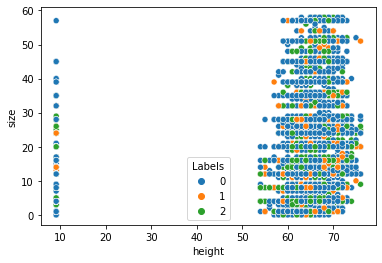

In [198]:
sns.scatterplot(df_kmeans['height'],df_kmeans['size'],hue='Labels',data=df_kmeans)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


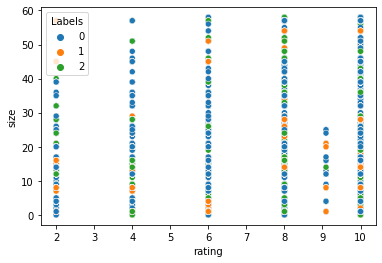

In [199]:
sns.scatterplot(df_kmeans['rating'],df_kmeans['size'],hue='Labels',data=df_kmeans)
plt.show()

In [212]:
df_scaled_min=df_scaled.head(1000)

In [213]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_scaled_min)
    labels = kmeans.predict(df_scaled_min)
    print(i,silhouette_score(df_scaled_min,labels))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


2 0.8888062661248723


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


3 0.8805929320730383
4 0.8160862823211885


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


5 0.09361356287073223
6 0.6894921820671753


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


7 0.04737438339037417


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


8 0.06733878225663502


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


9 0.48607189875886686
10 0.02569667611197016


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\an

11 0.7540325238783487


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


12 0.009796008571020674
13 0.0017926321111239325


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


14 0.05189714640966689


#### From above, we can observe that for 2 clusters the silhoutte score is highest, we can choose optimal clusters as K=2

# Agglomerative Clustering 

In [201]:
df_scaled_min=df_scaled.head(1000)

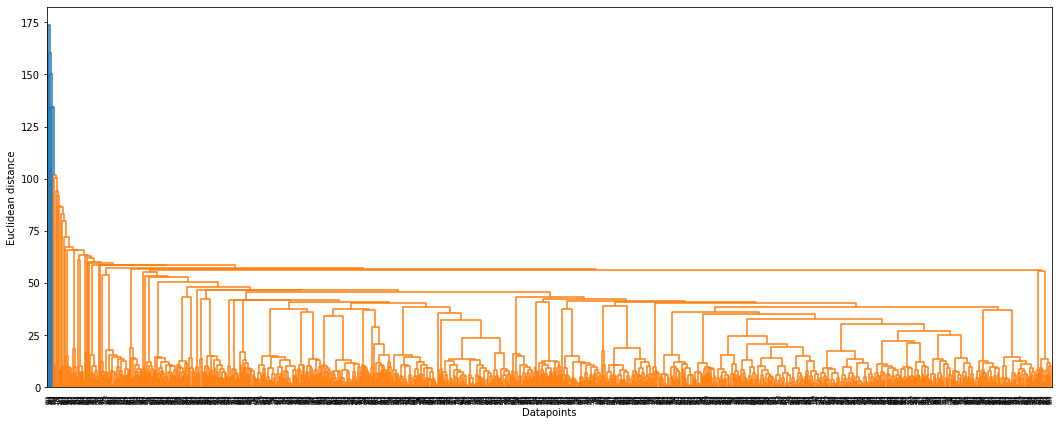

In [202]:
plt.figure(figsize=[18,7])
merg = linkage(df_scaled_min, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [204]:
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')

hie_cluster_model = hie_cluster.fit(df_scaled_min)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [205]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(2)

,Labels
0,0
1,0


In [206]:
df_hier = df.join(df_label1)
df_hier.head()

,weight,rating,height,size,age,9.092371481123546,apple,athletic,full bust,hourglass,...,everyday,formal affair,other,party,vacation,wedding,work,large,small,Labels
0,137,10.0,68.0,14,28.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.0
1,132,10.0,66.0,12,36.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
3,135,8.0,65.0,8,34.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
4,145,10.0,69.0,12,27.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.0
5,138,8.0,68.0,8,45.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [207]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df_scaled_min)
    labels = hier.fit_predict(df_scaled_min)
    print(i,silhouette_score(df_scaled_min,labels))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


2 0.8888062661248723


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


3 0.8805929320730383


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


4 0.8733661217790362


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


5 0.8596732347597442


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


6 0.8601700138151498


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


7 0.8192033464871635


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


8 0.7517261711535975


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


9 0.7525940590385322


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


10 0.7534266576348724


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


11 0.7541816402858165


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


12 0.7204085814178888


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


13 0.7212885602135447


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


14 0.702948916263651


#### From above, we can observe that the silhouette score is high for 2  clusters 

# Conclusion

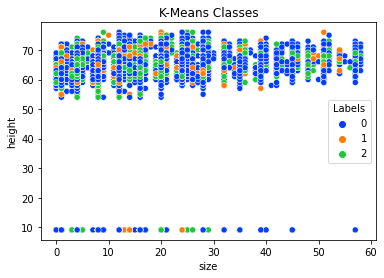

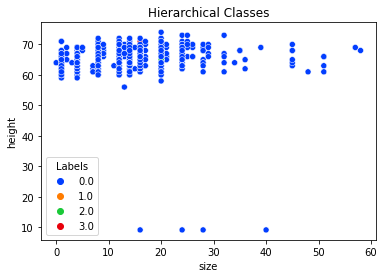

In [210]:
plt.title('K-Means Classes')
sns.scatterplot(x='size',y='height',hue='Labels',data=df_kmeans,palette='bright')
plt.show()

plt.title('Hierarchical Classes')
sns.scatterplot(x='size',y='height',hue='Labels',data=df_hier,palette='bright')
plt.show()